In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.metrics import f1_score


train_df = pd.read_csv("data/train.dat",header=None, delimiter=r"\s+", dtype=float)
X = train_df.values

train_labels_df = pd.read_csv("data/train.labels", header=None, delimiter=r"\s+", dtype=int)
Y = np.concatenate(np.array(train_labels_df.values), axis=0)

test_df = pd.read_csv("data/test.dat", header=None, delimiter=r"\s+", dtype=float)
test = test_df.values



In [59]:
from collections import Counter
c = Counter(Y )   
print(c)
print("len:",len(Y))

Counter({1: 10375, 2: 7646, 3: 1743, 8: 850, 4: 294, 5: 198, 7: 52, 6: 18, 11: 7, 10: 3})
len: 21186


# data-preporcessing


In [60]:
# delete the class :6,11,10,7
delete = [6,11,10,7]
df1 = pd.DataFrame(X)
df1['class'] = Y

df1 = df1[df1["class"] !=6]
#df1 = df1[df1["class"] !=7]
df1 = df1[df1["class"] !=10]
df1 = df1[df1["class"] !=11]

Y = df1["class"].values
df1= df1.drop(["class"], axis=1)
X = df1.values

In [61]:
#SMOTE
#!pip install imbalanced-learn
#!pip install delayed
#!pip install sklearn.utils.fixes
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [62]:
c = Counter(Y )   
print(c)
print("len:",len(Y))

Counter({2: 10375, 1: 10375, 3: 10375, 8: 10375, 4: 10375, 5: 10375, 7: 10375})
len: 72625


In [63]:
#pca = PCA(n_components = 0.70)
#pca = PCA(n_components=100)
#X= pca.fit_transform(X)

#pca.fit(X_test)
#pca_X_test = pca.transform(X_test)


In [64]:
# only use train data to test out models
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [65]:
para = ['4','5','6','7','8','9','10','11']
F1 = []

In [66]:
# K-Neighbors
for i in range (4,12):
    kclf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(kclf, X_train, y_train, cv=5, scoring='f1_micro')
    score = np.average(scores)
    F1.append(score)

In [67]:
# write data into correct format
#np.savetxt('K_pca50.dat', y_pred, delimiter=',',fmt='%i')

In [68]:
# write data into correct format
#np.savetxt('LDA.dat', y_pred, delimiter=',',fmt='%i')


In [69]:
print(para) 
print(F1)

['4', '5', '6', '7', '8', '9', '10', '11']
[0.889312919561962, 0.8785531138252397, 0.8755631117690973, 0.8668489471305205, 0.863740983869923, 0.8572103232430681, 0.8532761653014639, 0.8476700161589419]


<Figure size 1000x500 with 0 Axes>

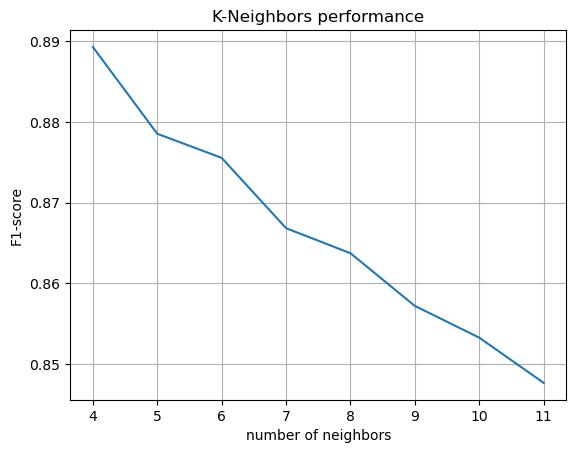

In [73]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
ax.plot(para, F1)

ax.set(xlabel='number of neighbors', ylabel='F1-score',
       title='K-Neighbors performance')
ax.grid()

plt.show()

In [71]:
from sklearn.model_selection import cross_val_score
kclf = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(kclf, X, Y, cv=5)
scores

array([0.89576592, 0.90285714, 0.89218589, 0.90870912, 0.92936317])

In [72]:
np.average(scores)

0.905776247848537